# Hierarchical Clustering in Python with SciPy

### Step 1 – Import Necessary Libraries
 

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

### Step 2 – Load and Preprocess the Dataset


In [2]:
# Load the dataset
data = load_wine()
X = data.data

# Convert to DataFrame
wine_df = pd.DataFrame(X, columns=data.feature_names)

In [3]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
print(wine_df.shape)

(178, 13)


In [5]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Step 3 – Perform Hierarchical Clustering and Plot the Dendrogram


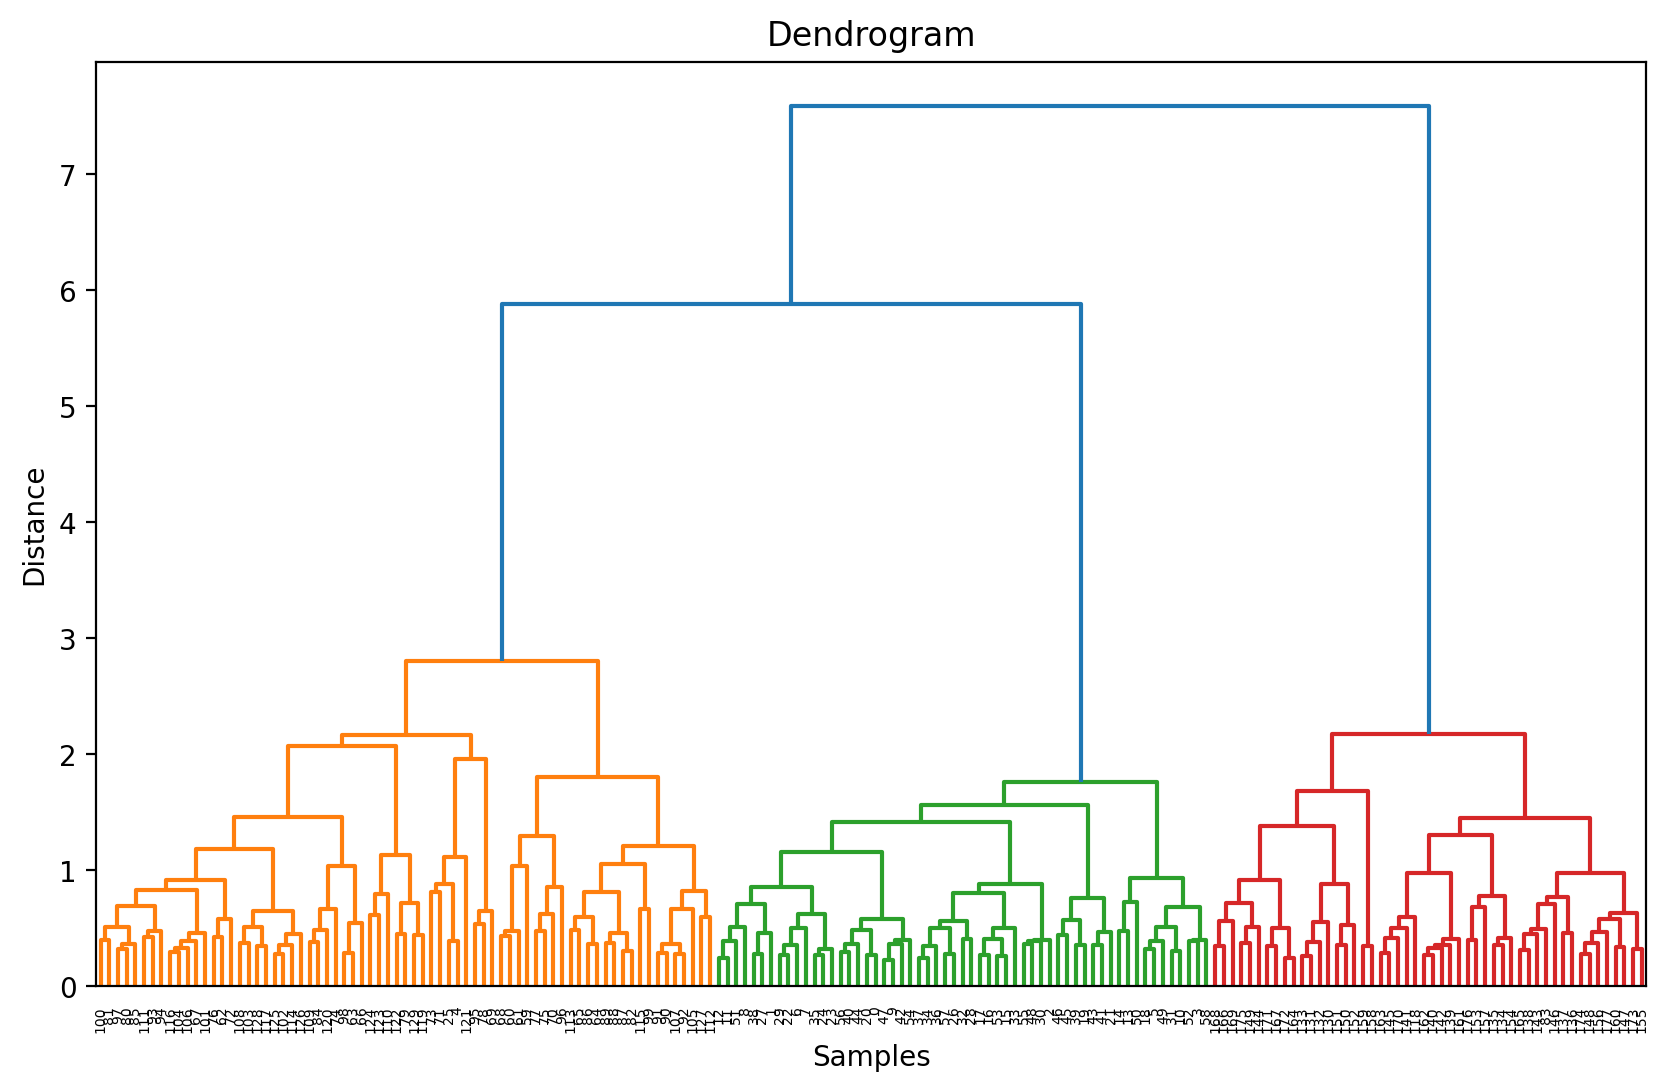

In [6]:
# Calculate linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Truncating the Dendrogram for Easier Visualization
 

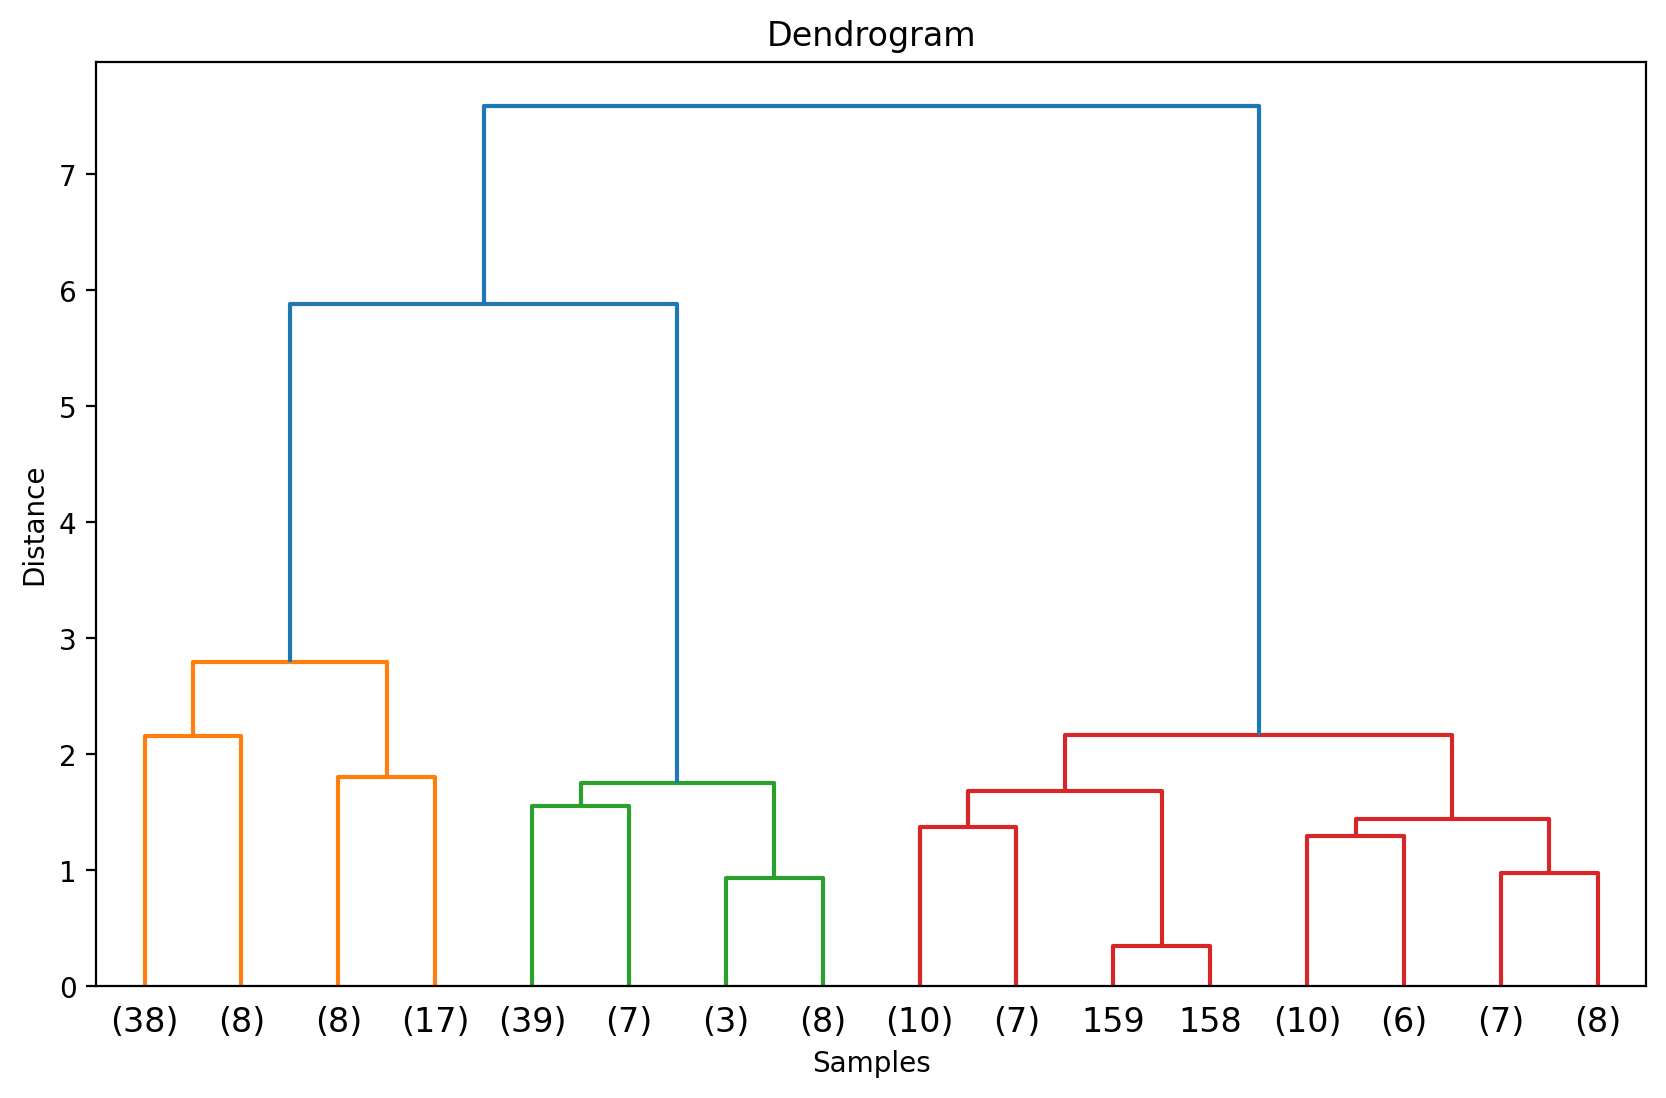

In [7]:
# Calculate linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Step 4 – Identify the Optimal Number of Clusters

The optimal number of clusters is 3.

### Step 5 – Form the Clusters

In [8]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold distance based on the dendrogram
threshold_distance = 3.5  

# Cut the dendrogram to get cluster labels
cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Assign cluster labels to the DataFrame
wine_df['cluster'] = cluster_labels

In [9]:
print(wine_df['cluster'])

0      2
1      2
2      2
3      2
4      3
      ..
173    1
174    1
175    1
176    1
177    1
Name: cluster, Length: 178, dtype: int32


### Step 6 – Visualize the Clusters


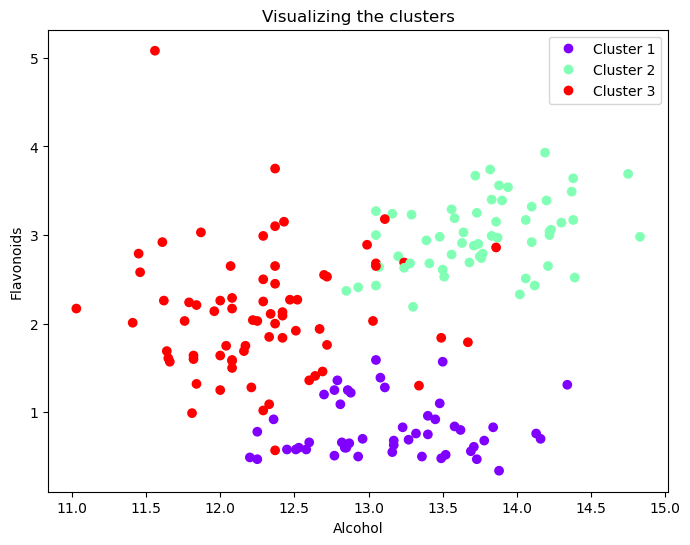

In [11]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], c=wine_df['cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.title('Visualizing the clusters')

# Add legend
# Determine the number of clusters in your data
n_clusters = len(wine_df['cluster'].unique())

legend_labels = [f'Cluster {i + 1}' for i in range(n_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()